# Chapter 6
## Internal Consistency
In the optimizer demonstration below, we demonstrate that there is good reason to trust optimizer outputs, even when the optimizer is not able to match experimental cell behavior always.

The business of matching experimental cell behavior is tricky, as neuronal model simulators are by nature artificially constrained. Neural model simulators are not arbitary waveform generators, they can't match every waveform, even realistic ones.

Additionally in chapter 3 we saw that some of the data we used to optimize is bi-modal.

### Below: setup environment

In [1]:
import pickle
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
from neuronunit.optimisation.optimization_management import OptMan, TSD
import warnings

<Figure size 640x480 with 1 Axes>

consider installing pynn a heavier backend
glif python Error


In [2]:
%%capture
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))
use_test = TSD(rts['Hippocampus CA1 pyramidal cell'])#['RheobaseTest']]
use_test.use_rheobase_score = True


easy_standards = {ut.name:ut.observation['std'] for ut in use_test.values()}

[(value.name,value.observation) for value in use_test.values()]
try:
    with open('jd_.p','rb') as f:
        results,converged,target,simulated_tests = pickle.load(f)
except:
    OM = OptMan(use_test,protocol={'elephant':True,'allen':False,'dm':False})
    results,converged,target,simulated_tests = OM.round_trip_test(use_test,
                                                                  str('RAW'),\
                                                                  MU=10,NGEN=10,stds = easy_standards)
with open('jd_.p','wb') as f:
    pickle.dump([results,converged,target,simulated_tests],f)    

# In the above notebook cell
we simulated some data, constructed ***NeuronUnit*** tests from the data.
Then showed that the optimizer can find good agreement between simulated data, and model behavior.

In [3]:
#!mv jd_.p adpexp.p
import warnings
warnings.filterwarnings("ignore")
from neuronunit.optimisation import model_parameters
try:
    #assert 1==2
    
    with open('adpexp.p','rb') as f:
        similar = pickle.load(f)

except:
    sim_tests = TSD(simulated_tests)
    sim_tests.use_rheobase_score = True

    backend = str('ADEXP')
    similar = sim_tests.optimize(model_parameters.MODEL_PARAMS[backend], NGEN=10, \
                                 backend=backend, MU=10, \
                                 protocol={'allen': False, 'elephant': True})

    with open('adpexp.p','wb') as f:
        pickle.dump(similar[0]['dtc_pop'],f)

In [4]:
#with open('adpexp.p','wb') as f:
#    pickle.dump(similar[0]['dtc_pop'],f)
#%%capture
    
import pickle
with open('adpexp.p','rb') as f:
    similar = pickle.load(f)
print(similar)    

with open('jd_.p','rb') as f:
    results,converged,target,simulated_tests = pickle.load(f)


with open('jd_.p','rb') as f:
    results,converged,target,simulated_tests = pickle.load(f)


[{'pop': [[50, 0.03, -2, -59.725515957038425, 149.48175614953686], [50, 0.03, -2, -59.725515957038425, 149.48175614953686], [53.75578420001001, 0.03, 15, -40.274484042961575, 11.060765169221611], [53.75578420001001, 0.02982911361208811, 15, -40.274484042961575, 11.060765169221611], [154.0360021014063, 0.029444272986589415, 12.113241333917744, -56.982303960677854, 139.6109833763195], [52.95119264127719, 0.0110882583721106, -2, -40.38702541418095, 10], [121.90180517385826, 0.03, 12.584445756885394, -40.274484042961575, 29.461152148088928], [154.0360021014063, 0.029444272986589415, 14.986284112053841, -56.982303960677854, 10.654819477171543], [63.52861167174264, 0.021081265728131578, 9.643804539236864, -50.35258158827463, 81.23652118639065], [85.42503966079549, 0.010185667112555053, 0.0849572364873783, -45.42984451413734, 10.256629104839742], [56.794819092113315, 0.03, -2, -59.725515957038425, 149.48175614953686], [50, 0.03, -2, -59.725515957038425, 149.48175614953686], [53.75578420001001

# In the above notebook cell

we took the simulated data used from one model class Izhikitich with its pre-constructed ***NeuronUnit*** tests of the data from the previous cell, then we showed that the optimizer can find good agreement between simulated data generated from one model class, and model behavior from a different class.

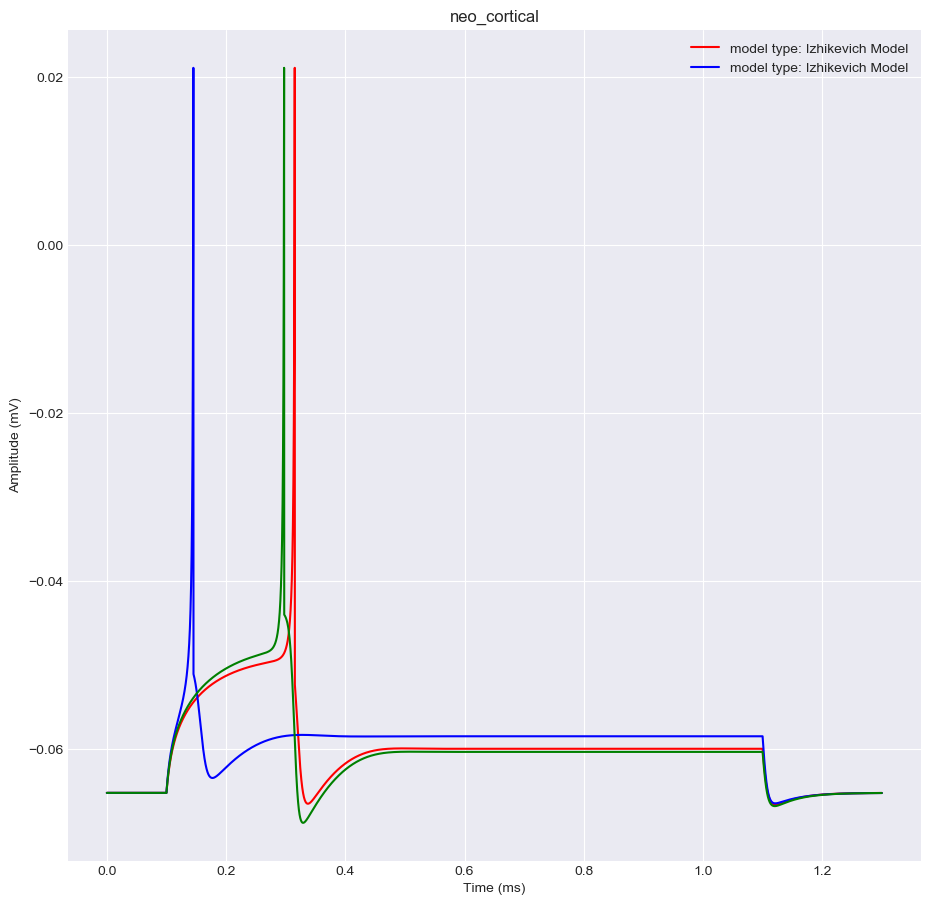

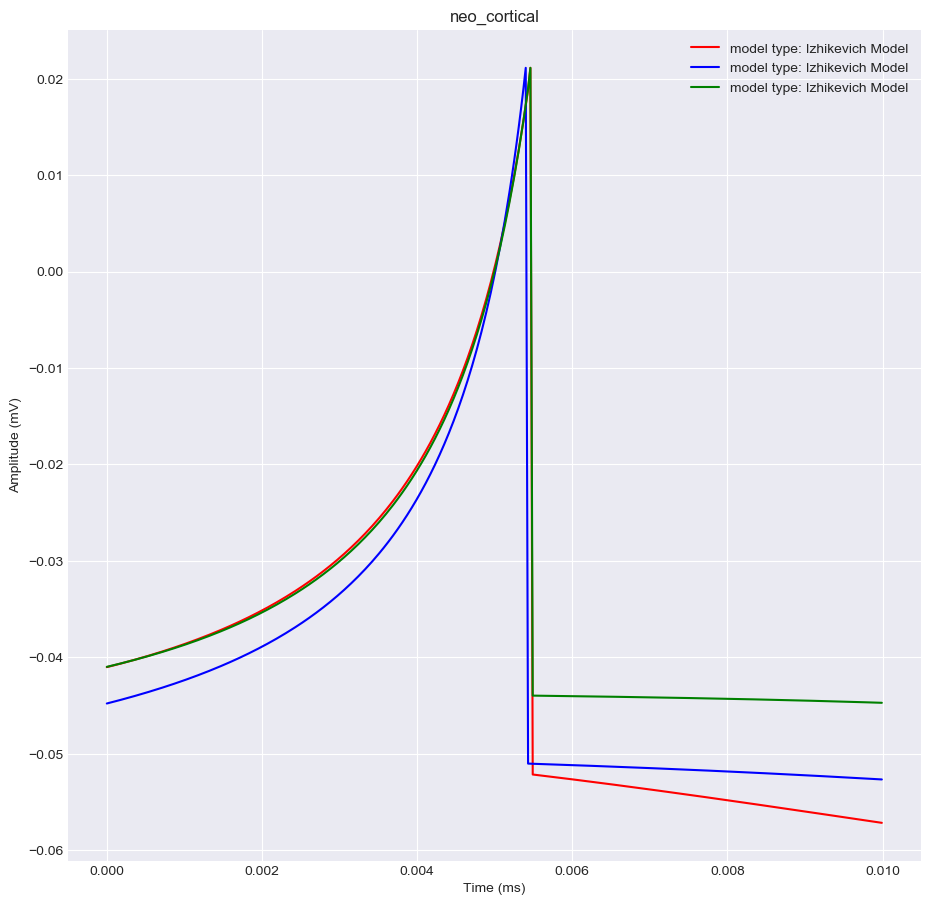

(None, None)

In [5]:
similar = similar[0]['dtc_pop']
from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_allen_evaluation, prediction_current_and_features

inject_and_plot([converged[0]],second_pop=[target[0]],third_pop=[similar[0]],snippets=False)  
inject_and_plot([converged[0]],second_pop=[target[0]],third_pop=[similar[0]],snippets=True)  

#from neuronunit.optimisation.optiimization_management import inject_and_plot


In [6]:
similar[0].backend

'RAW'

In [7]:
import warnings
warnings.filterwarnings("ignore")
import copy
OM = OptMan(use_test,protocol={'elephant':True,'allen':False,'dm':False})
#final_simulated_mutated_tests = copy.copy(sim_tests)

#final_simulated_mutated_tests.use_rheobase_score = True
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))
use_test = TSD(rts['Hippocampus CA1 pyramidal cell'])#['RheobaseTest']]
use_test.use_rheobase_score = True
print(use_test['RheobaseTest'])


RheobaseTest


## Here we do a similar thing again
we simiulate more data, except from a different model/simulator.
We are interested in if the brian2 adaptive exponential can generate data that the forward-euler Izhikitich model can learn to agree with.


In [ ]:
results,converged,target,final_simulated_mutated_tests = OM.round_trip_test(use_test,
                                                              str('ADEXP'),\
                                                              MU=1,NGEN=1,stds = easy_standards)

final_simulated_mutated_tests = TSD(final_simulated_mutated_tests)
final_simulated_mutated_tests.use_rheobase_score = True
final_simulated_mutated_tests

backend = str('RAW')
similar = final_simulated_mutated_tests.optimize(model_parameters.MODEL_PARAMS[backend], NGEN=10, \
                             backend=backend, MU=10, \
                             protocol={'allen': False, 'elephant': True})

{'amplitude': array(91.0703125) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
{'amplitude': array(91.0703125) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
True
True
Z = 18.71
{'mean': array(-0.07) * V, 'std': array(1.26222751e-11) * V} {'mean': array(-0.07) * V, 'std': array(2.77354879e-11) * V}
Z = 18.71
{'mean': array(-0.07) * V, 'std': array(1.26222751e-11) * V} {'mean': array(-0.07) * V, 'std': array(-1.04999999) * V}
True
True
True
True
True
{'amplitude': array(59.6171875) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
{'amplitude': array(59.6171875) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
{'amplitude': array(59.6171875) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
{'amplitude': array(59.6171875) * pA, 'delay': array(100.) * ms, 'duration': array(1000.) * ms}
True
True
1
[[87.5, 0.4375, 0.875, -30, 0.4375, 4.375, -43.75, 1.75, 6.125, -44.625, -70, 0.07875, 0.01]]
True
Z = 18.71
{'mean'

[[50, 0.01, 14.62109969273686, -60, 10, 0.005, 0.7, 25, -73.37265412714963, -50], [50, 0.01, -1.6210996927368608, -60, 10, 0.005, 0.7, 25, -57.62734587285037, -50], [50, 0.03, -2.0, -60, 150, 0.005, 0.7, 50, -75, -49.936098728048115], [50, 0.03, 15, -60, 150, 0.005, 0.7, 50, -56, -50], [200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [62.872763589037376, 0.01851108212663449, 3.9204383231304565, -50.90994656295401, 124.4270168435703, 0.005, 0.7359798856916286, 49.18062960971133, -71.0324467088042, -45.14148472303063], [113.93744747726336, 0.012513705711920009, 14.34024291309543, -56.92246184310234, 110.47031628667355, 0.005, 1.3348104895348951, 36.463518186780135, -57.629652755078055, -49.33463990386922], [63.926869801020395, 0.022997519571866416, 12.03013193054934, -49.99568829383047, 41.012898202093126, 0.005, 1.0772909675341997, 38.117458643534874, -71.2456267178069, -49.649793965200786]]
True
True
Z = -267198609.03
{'mean': array(-0.07) * V, 'std': array(1.26222751e-11) * V} {'m

INFO:__main__:gen	nevals	avg     	std     	min    	max    
1  	8     	5.54274 	0.679961	4.96678	6.88286
2  	8     	0.656164	1.73605 	0      	5.24931


[[200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [63.86107621803555, 0.014942925989248455, 14.334833509265284, -56.92246184310234, 116.09437887609262, 0.005, 1.3344832533055158, 36.4568381646098, -71.14992894655761, -49.34682773403264], [114.0033019892011, 0.02305719386844934, 12.03553926177742, -49.99568829383047, 41.012898202093126, 0.005, 1.0776182037637818, 39.036781335578404, -57.72710289613854, -49.63760613503744], [50, 0.01, -1.6210996927368608, -60, 10, 0.005, 0.7, 25, -74.52070433123852, -49.99585021398268], [50, 0.03, -2.0, -60, 150, 0.005, 0.7, 50, -57.83675221719922, -49.93931557917511], [113.93744747726336, 0.018639137142428798, 14.34024291309543, -51.36657303444491, 110.13213580876234, 0.005, 1.3348104895348951, 36.463518186780135, -57.00776903010497, -49.343586975139004], [62.872763589037376, 0.012385651491391437, 3.9204383231304565, -56.4658353490113, 124.7651973214815, 0.005, 0.7359798856916286, 49.1806296097113

INFO:__main__:3  	7     	0       	0       	0      	0      


[[200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [109.56140107538724, 0.01500260027930203, 14.48096027122362, -59.76367599537771, 10.303191572597221, 0.005, 1.3344832533055158, 36.416266734774, -57.629652755078055, -49.65842422793201], [52.42261602584293, 0.01, -1.692635798613808, -57.11507867855859, 114.01609567533279, 0.005, 0.7, 25.2252457271374, -57.62734587285037, -49.98188630079552], [63.86107621803555, 0.014942925989248455, 14.334833509265284, -56.92246184310234, 116.09437887609262, 0.005, 1.3344832533055158, 36.4568381646098, -71.14992894655761, -49.34682773403264], [50, 0.03, -2.0, -60, 150, 0.005, 0.7, 49.291883672542134, -57.83675221719922, -49.93931557917511], [114.0033019892011, 0.02305719386844934, 12.09240287357256, -49.99568829383047, 109.63591716254957, 0.005, 1.089980713828172, 38.999053714679384, -57.72710289613854, -49.63760613503744], [113.93744747726336, 0.012513705711920009, 14.283377361384563, -56.9224618

INFO:__main__:4  	8     	0.623085	1.64853 	0      	4.98468


[[200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [200, 0.03, 15, -40, 150, 0.005, 1.6, 50, -56, -40], [63.357098067935205, 0.01, -1.41139146651666, -56.94388722039944, 13.920961043173627, 0.005, 0.7216032199818153, 36.45182756578175, -58.18668758849139, -50], [50.71263712217596, 0.014942925989248455, 14.166475411698773, -59.92930917135853, 113.82194753078998, 0.005, 1.3228009821323221, 26.926277078566013, -70.59217391109607, -49.34682773403264], [50, 0.014326696193174603, -1.9385263994362845, -59.994810331646974, 143.17550763698975, 0.005, 0.7, 49.291883672542134, -57.8380891484511, -49.943830545513904], [109.56140107538724, 0.029969656465279243, 14.735463876299995, -58.79369408190417, 16.876982562161615, 0.005, 1.3344832533055158, 36.416266734774, -57.62831582382618, -49.6539039724711], [113.96331710965775, 0.010024308975744644, 12.50539412826859, -57.11507867855859, 109.60971676582179, 0.005, 1.0888613420509483, 25.2252457271374, -57.62734587285037, -49.97148454436256], [52.6195

In [ ]:

with open('jd_.p','rb') as f:
    results,converged,target,simulated_tests = pickle.load(f)

In [ ]:
from neuronunit.optimisation import inject_and_plot
inject_and_plot(converged,second_pop=target,snipets=False)